# Clustering Playlists

## Processing Data
* Cleaning data
* Split training set and testing set
* Scaling data

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Read the csv file into a pandas DataFrame
playlist_mean_df = pd.read_csv(Path("Resources/playlist_mean.csv"))

# Review the DataFrame
playlist_mean_df

,Unnamed: 0,pid,tracks_found,mean_danceability,mean_energy,mean_key,mean_loudness,mean_mode,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_liveness,mean_valence,mean_tempo,mean_duration_ms
0,0,0,49,0.661061,0.780918,4.775510,-4.830939,0.673469,0.104929,0.081336,0.000716,0.186316,0.644816,121.858980,222280.285714
1,1,1,38,0.493655,0.693368,4.447368,-8.181184,0.552632,0.092413,0.166215,0.229575,0.179221,0.483737,125.618053,290857.578947
2,2,2,61,0.674049,0.697951,4.934426,-4.788918,0.508197,0.096751,0.257482,0.000669,0.168790,0.569705,115.354410,220038.836066
3,3,3,122,0.513131,0.616546,5.139344,-9.632697,0.713115,0.067923,0.280629,0.207753,0.185007,0.441988,125.172148,228786.040984
4,4,4,16,0.588625,0.635069,3.437500,-7.857563,0.812500,0.041250,0.188235,0.086869,0.164806,0.491625,124.814375,254779.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,999995,32,0.500344,0.648406,5.500000,-6.406250,0.906250,0.039366,0.189567,0.000492,0.125594,0.362384,124.214562,265669.562500
999996,999996,999996,119,0.486832,0.768840,5.403361,-5.728513,0.747899,0.053197,0.068167,0.005131,0.210105,0.412919,127.747109,254305.462185
999997,999997,999997,23,0.711957,0.578609,5.478261,-7.775522,0.478261,0.085770,0.336330,0.001713,0.147539,0.594696,120.596783,250042.086957
999998,999998,999998,11,0.444091,0.613545,5.181818,-6.014182,0.909091,0.040500,0.284768,0.000247,0.156418,0.254091,119.226364,264506.818182


In [4]:
# Retain the useful columns to fit the model
playlist_mean_df = playlist_mean_df[['pid', 'mean_danceability', 'mean_energy',
       'mean_key', 'mean_loudness', 'mean_mode', 'mean_speechiness',
       'mean_acousticness', 'mean_instrumentalness', 'mean_liveness',
       'mean_valence', 'mean_tempo', 'mean_duration_ms']]
# Check out `playlist_mean_df`
playlist_mean_df

,pid,mean_danceability,mean_energy,mean_key,mean_loudness,mean_mode,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_liveness,mean_valence,mean_tempo,mean_duration_ms
0,0,0.661061,0.780918,4.775510,-4.830939,0.673469,0.104929,0.081336,0.000716,0.186316,0.644816,121.858980,222280.285714
1,1,0.493655,0.693368,4.447368,-8.181184,0.552632,0.092413,0.166215,0.229575,0.179221,0.483737,125.618053,290857.578947
2,2,0.674049,0.697951,4.934426,-4.788918,0.508197,0.096751,0.257482,0.000669,0.168790,0.569705,115.354410,220038.836066
3,3,0.513131,0.616546,5.139344,-9.632697,0.713115,0.067923,0.280629,0.207753,0.185007,0.441988,125.172148,228786.040984
4,4,0.588625,0.635069,3.437500,-7.857563,0.812500,0.041250,0.188235,0.086869,0.164806,0.491625,124.814375,254779.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,0.500344,0.648406,5.500000,-6.406250,0.906250,0.039366,0.189567,0.000492,0.125594,0.362384,124.214562,265669.562500
999996,999996,0.486832,0.768840,5.403361,-5.728513,0.747899,0.053197,0.068167,0.005131,0.210105,0.412919,127.747109,254305.462185
999997,999997,0.711957,0.578609,5.478261,-7.775522,0.478261,0.085770,0.336330,0.001713,0.147539,0.594696,120.596783,250042.086957
999998,999998,0.444091,0.613545,5.181818,-6.014182,0.909091,0.040500,0.284768,0.000247,0.156418,0.254091,119.226364,264506.818182


## Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [13]:
# Scaled the data 
scaler = StandardScaler()
scaler.fit(playlist_mean_df.drop('pid',axis=1))
scaled_playlist_mean = scaler.transform(playlist_mean_df.drop('pid',axis=1))

In [15]:
scaled_playlist_mean_df = pd.DataFrame(scaled_playlist_mean,columns=playlist_mean_df.drop('pid',axis=1).columns, index=playlist_mean_df.index)
scaled_playlist_mean_df

,mean_danceability,mean_energy,mean_key,mean_loudness,mean_mode,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_liveness,mean_valence,mean_tempo,mean_duration_ms
0,0.573574,1.090749,-0.582789,1.026373,0.112596,0.207149,-0.917369,-0.481507,-0.029772,1.218744,0.095012,-0.335727
1,-1.155481,0.430645,-1.067303,-0.315288,-0.668222,-0.014823,-0.432343,1.269853,-0.192104,-0.037320,0.598341,1.455013
2,0.707720,0.465195,-0.348143,1.043201,-0.955347,0.062109,0.089191,-0.481863,-0.430750,0.633041,-0.775929,-0.394257
3,-0.954324,-0.148577,-0.045574,-0.896570,0.368772,-0.449179,0.221459,1.102858,-0.059720,-0.362870,0.538635,-0.165844
4,-0.174585,-0.008920,-2.558412,-0.185688,1.010970,-0.922249,-0.306511,0.177784,-0.521898,0.024190,0.490731,0.512915
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-1.086399,0.091642,0.486948,0.395514,1.616754,-0.955670,-0.298901,-0.483216,-1.419033,-0.983600,0.410418,0.797285
999996,-1.225956,0.999683,0.344257,0.666925,0.593538,-0.710349,-0.992625,-0.447718,0.514485,-0.589539,0.883415,0.500538
999997,1.099246,-0.434614,0.454849,-0.152834,-1.148783,-0.132653,0.539756,-0.473873,-0.916949,0.827913,-0.073992,0.389209
999998,-1.667407,-0.171200,0.017140,0.552524,1.635111,-0.935551,0.245111,-0.485093,-0.713807,-1.828049,-0.257487,0.766923


## Finding K Value


In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
import time

In [17]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 15))

In [18]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(scaled_playlist_mean_df)
    inertia.append(k_model.inertia_)

/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

In [19]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,1.200000e+07
1,2,9.518765e+06
2,3,8.496255e+06
3,4,7.625173e+06
4,5,7.120978e+06
5,6,6.735494e+06
6,7,6.447362e+06
7,8,6.170464e+06
8,9,5.954311e+06
9,10,5.774096e+06


In [24]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)


:Curve   [k]   (inertia)

In [ ]:
# Calculating the `silhouette_score`
start_time = time.time()

sil_score = []
k=list(range(1,10))
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    score = silhouette_score(scaled_playlist_mean_df, kmeans.fit_predict(scaled_playlist_mean_df))
    sil_score.append(score)
    
sil_score_data = {"k": k, "silhouette_score": sil_score}
sil_score_df = pd.DataFrame(sil_score_data)

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Plot the silhoutte score
sil_score_df.hvplot.line(
    x="k", 
    y="silhouette_score", 
    title="Silhouette Score", 
    xticks=k
)

## Playlist Clustering 
* We use centroid methods `KMeans`, `Birch`, `Agglomoerative`, `GaussianMixture`
* Feel free to change the cluster number to see different results in cluster visualization

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
# Initialize the K-Means model with n_clusters=4,5,6
model = KMeans(n_clusters=4)

# Fit the model for the scaled_playlist_df
model.fit(scaled_playlist_mean_df)

# Save the predicted model clusters to a new DataFrame.
playlist_clusters = model.predict(scaled_playlist_mean_df)

# View the playlist clusters
print(playlist_clusters)

/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 0 ... 0 1 3]


In [27]:
# Create a copy of the concatenated DataFrame
clustered_scaled_playlist_df = scaled_playlist_mean_df.copy()

# Create a new column in the copy of the concatenated DataFrame with the predicted clusters
clustered_scaled_playlist_df["playlist_clusters"] = playlist_clusters

# Review the DataFrame
clustered_scaled_playlist_df.head()

,mean_danceability,mean_energy,mean_key,mean_loudness,mean_mode,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_liveness,mean_valence,mean_tempo,mean_duration_ms,playlist_clusters
0,0.573574,1.090749,-0.582789,1.026373,0.112596,0.207149,-0.917369,-0.481507,-0.029772,1.218744,0.095012,-0.335727,3
1,-1.155481,0.430645,-1.067303,-0.315288,-0.668222,-0.014823,-0.432343,1.269853,-0.192104,-0.037320,0.598341,1.455013,3
2,0.707720,0.465195,-0.348143,1.043201,-0.955347,0.062109,0.089191,-0.481863,-0.430750,0.633041,-0.775929,-0.394257,0
3,-0.954324,-0.148577,-0.045574,-0.896570,0.368772,-0.449179,0.221459,1.102858,-0.059720,-0.362870,0.538635,-0.165844,1
4,-0.174585,-0.008920,-2.558412,-0.185688,1.010970,-0.922249,-0.306511,0.177784,-0.521898,0.024190,0.490731,0.512915,3


## Visualization Of Clustering

In [28]:
from sklearn.manifold import TSNE

### Cluster:4

In [29]:
visual_cluster_df = clustered_scaled_playlist_df.copy()

In [30]:
m = TSNE(learning_rate=50)

In [31]:
tsne_features = m.fit_transform(scaled_playlist_mean_df)

In [32]:
tsne_features[1:4,:]

array([[ 1.7572745 ,  0.05537996],
       [-2.1891606 ,  1.4127423 ],
       [ 2.8249888 , -0.26532128]], dtype=float32)

In [33]:
visual_cluster_df["X"] = tsne_features[:,0]
visual_cluster_df["y"] = tsne_features[:,1]

/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


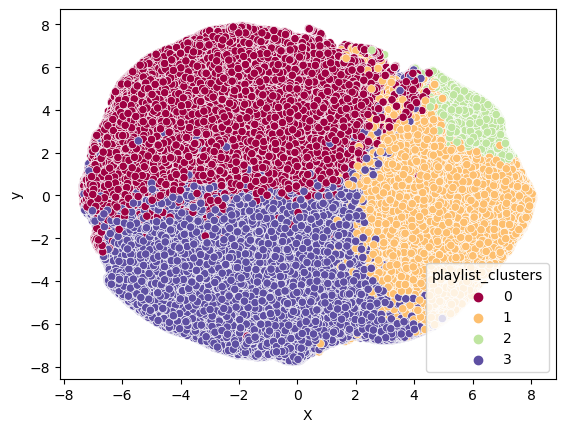

In [34]:
import seaborn as sns
sns.scatterplot(x="X", y="y", hue='playlist_clusters', palette='Spectral', data=visual_cluster_df)
plt.show()

### Cluster=5

In [22]:
# # Initialize the K-Means model with n_clusters=4,5,6
# model = KMeans(n_clusters=5)

# # Fit the model for the scaled_playlist_df
# model.fit(scaled_playlist_df)

# # Save the predicted model clusters to a new DataFrame.
# playlist_clusters = model.predict(scaled_playlist_df)

# # View the playlist clusters
# print(playlist_clusters)
# # Create a copy of the concatenated DataFrame
# clustered_scaled_playlist_df = scaled_playlist_df.copy()

# # Create a new column in the copy of the concatenated DataFrame with the predicted clusters
# clustered_scaled_playlist_df["playlist_clusters"] = playlist_clusters

# # Review the DataFrame
# clustered_scaled_playlist_df.head()

In [23]:
# visual_cluster_df = clustered_scaled_playlist_df.copy()
# m = TSNE(learning_rate=50)
# tsne_features = m.fit_transform(scaled_playlist_df)
# tsne_features[1:4,:]
# visual_cluster_df["X"] = tsne_features[:,0]
# visual_cluster_df["y"] = tsne_features[:,1]
# import seaborn as sns
# sns.scatterplot(x="X", y="y", hue='playlist_clusters', palette='Spectral', data=visual_cluster_df)
# plt.show()

### Cluster=6

In [24]:
# # Initialize the K-Means model with n_clusters=4,5,6
# model = KMeans(n_clusters=6)

# # Fit the model for the scaled_playlist_df
# model.fit(scaled_playlist_df)

# # Save the predicted model clusters to a new DataFrame.
# playlist_clusters = model.predict(scaled_playlist_df)

# # View the playlist clusters
# print(playlist_clusters)
# # Create a copy of the concatenated DataFrame
# clustered_scaled_playlist_df = scaled_playlist_df.copy()

# # Create a new column in the copy of the concatenated DataFrame with the predicted clusters
# clustered_scaled_playlist_df["playlist_clusters"] = playlist_clusters

# # Review the DataFrame
# clustered_scaled_playlist_df.head()

In [25]:
# visual_cluster_df = clustered_scaled_playlist_df.copy()
# m = TSNE(learning_rate=50)
# tsne_features = m.fit_transform(scaled_playlist_df)
# tsne_features[1:4,:]
# visual_cluster_df["X"] = tsne_features[:,0]
# visual_cluster_df["y"] = tsne_features[:,1]
# import seaborn as sns
# sns.scatterplot(x="X", y="y", hue='playlist_clusters', palette='Spectral', data=visual_cluster_df)
# plt.show()

### Cluster=7

In [26]:
# # Initialize the K-Means model with n_clusters=4,5,6
# model = KMeans(n_clusters=7)

# # Fit the model for the scaled_playlist_df
# model.fit(scaled_playlist_df)

# # Save the predicted model clusters to a new DataFrame.
# playlist_clusters = model.predict(scaled_playlist_df)

# # View the playlist clusters
# print(playlist_clusters)
# # Create a copy of the concatenated DataFrame
# clustered_scaled_playlist_df = scaled_playlist_df.copy()

# # Create a new column in the copy of the concatenated DataFrame with the predicted clusters
# clustered_scaled_playlist_df["playlist_clusters"] = playlist_clusters

# # Review the DataFrame
# clustered_scaled_playlist_df.head()

In [27]:
# visual_cluster_df = clustered_scaled_playlist_df.copy()
# m = TSNE(learning_rate=50)
# tsne_features = m.fit_transform(scaled_playlist_df)
# tsne_features[1:4,:]
# visual_cluster_df["X"] = tsne_features[:,0]
# visual_cluster_df["y"] = tsne_features[:,1]
# import seaborn as sns
# sns.scatterplot(x="X", y="y", hue='playlist_clusters', palette='Spectral', data=visual_cluster_df)
# plt.show()

### Cluster=8

In [35]:
# Initialize the K-Means model with n_clusters=4,5,6
model = KMeans(n_clusters=8)

# Fit the model for the scaled_playlist_df
model.fit(scaled_playlist_mean_df)

# Save the predicted model clusters to a new DataFrame.
playlist_clusters = model.predict(scaled_playlist_mean_df)

# View the playlist clusters
print(playlist_clusters)
# Create a copy of the concatenated DataFrame
clustered_scaled_playlist_df = scaled_playlist_mean_df.copy()

# Create a new column in the copy of the concatenated DataFrame with the predicted clusters
clustered_scaled_playlist_df["playlist_clusters"] = playlist_clusters

# Review the DataFrame
clustered_scaled_playlist_df.head()

/Users/jiajialiu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 2 4 ... 4 3 3]


,mean_danceability,mean_energy,mean_key,mean_loudness,mean_mode,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_liveness,mean_valence,mean_tempo,mean_duration_ms,playlist_clusters
0,0.573574,1.090749,-0.582789,1.026373,0.112596,0.207149,-0.917369,-0.481507,-0.029772,1.218744,0.095012,-0.335727,4
1,-1.155481,0.430645,-1.067303,-0.315288,-0.668222,-0.014823,-0.432343,1.269853,-0.192104,-0.037320,0.598341,1.455013,2
2,0.707720,0.465195,-0.348143,1.043201,-0.955347,0.062109,0.089191,-0.481863,-0.430750,0.633041,-0.775929,-0.394257,4
3,-0.954324,-0.148577,-0.045574,-0.896570,0.368772,-0.449179,0.221459,1.102858,-0.059720,-0.362870,0.538635,-0.165844,3
4,-0.174585,-0.008920,-2.558412,-0.185688,1.010970,-0.922249,-0.306511,0.177784,-0.521898,0.024190,0.490731,0.512915,3


In [ ]:
visual_cluster_df = clustered_scaled_playlist_df.copy()
m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(scaled_playlist_mean_df)
tsne_features[1:4,:]
visual_cluster_df["X"] = tsne_features[:,0]
visual_cluster_df["y"] = tsne_features[:,1]
import seaborn as sns
sns.scatterplot(x="X", y="y", hue='playlist_clusters', palette='Spectral', data=visual_cluster_df)
plt.show()

## Clustering Input and Recommendation

In [ ]:
# Process the input playlist data
scaled_input_playlist_df = pd.DataFrame(data={
    'danceability':0.07272,
    'energy':-0.21237,
    'key':-0.103686,
    'loudness':0.274964,
    'mode':0.876177,
    'speechiness':0.152517,
    'acousticness':-0.31441,
    'instrumentalness':-0.377864,
    'liveness':-0.536152,
    'valence':0.210339,
    'tempo':0.465768,
    'duration_ms_y':-0.290816,
    'time_signature':0.582697
},index=[0])
# Check out the dataframe
scaled_input_playlist_df


In [ ]:
# Predict the label of the new playlist
input_playlist_cluster = model.predict(scaled_input_playlist_df)
input_playlist_cluster[0]

In [29]:
# Merge playlist_info_cluster_df with clustered_scaled_playlist_df
playlist_info_cluster_df = playlist_df.merge(clustered_scaled_playlist_df, how='inner', left_on='pid', right_on='pid')
# Clean the data 
playlist_info_cluster_df = playlist_info_cluster_df[['pid', 'name', 'track_uri', 'danceability_x', 'energy_x', 'key_x',
       'loudness_x', 'mode_x', 'speechiness_x', 'acousticness_x',
       'instrumentalness_x', 'liveness_x', 'valence_x', 'tempo_x',
       'duration_ms_y_x', 'time_signature_x', 'playlist_clusters']]
playlist_info_cluster_df.columns = ['pid', 'name', 'track_uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms_y', 'time_signature', 'playlist_clusters']
playlist_info_cluster_df

,pid,name,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms_y,time_signature,playlist_clusters
0,0,Throwbacks,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,226864,4,3
1,0,Throwbacks,spotify:track:3uoQULcUWfnt6nc6J7Vgai,0.829,0.627,1,-3.928,1,0.0759,0.006630,0.000000,0.0939,0.720,120.048,187133,4,3
2,0,Throwbacks,spotify:track:3BxWKCI06eQ5Od8TY2JBeA,0.570,0.821,2,-4.380,1,0.2670,0.178000,0.000000,0.2890,0.408,210.857,225560,4,3
3,0,Throwbacks,spotify:track:2nbClS09zsIAqNkshg6jnp,0.709,0.745,4,-6.437,0,0.0738,0.022500,0.000052,0.1540,0.576,126.027,234360,4,3
4,0,Throwbacks,spotify:track:69ghzc538EQSVon2Gm3wrr,0.580,0.750,4,-4.421,1,0.1940,0.159000,0.000000,0.2740,0.728,86.938,229107,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164697,197740,Boomtown,spotify:track:6IFXvzIqw7c2rzOIWI6Gx0,0.632,0.791,9,-6.856,0,0.0313,0.195000,0.000010,0.3530,0.804,92.854,245293,4,6
7164698,197740,Boomtown,spotify:track:5WOLghNew2YKZO96gYoM7p,0.579,0.267,4,-15.110,1,0.0348,0.118000,0.000562,0.1320,0.353,74.899,238573,4,6
7164699,197740,Boomtown,spotify:track:0B3hFXFOlbIPt942VGdNfb,0.474,0.442,11,-15.049,0,0.0423,0.000146,0.000212,0.2130,0.773,118.362,237507,4,6
7164700,197740,Boomtown,spotify:track:3zlfCTMl2MfHlYKJfMiO5K,0.420,0.741,2,-9.645,1,0.0487,0.054100,0.000004,0.1700,0.679,150.127,218067,4,6


In [30]:
# Locate the songs
recommend_playlist = playlist_info_cluster_df[playlist_info_cluster_df["playlist_clusters"]==input_playlist_cluster[0]]
recommend_playlist


,pid,name,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms_y,time_signature,playlist_clusters
270,4,90s,spotify:track:0c1gHntWjKD7QShC8s99sq,0.390,0.6490,2,-5.163,1,0.0345,0.172000,0.000000,0.2160,0.144,121.160,299760,4,6
271,4,90s,spotify:track:6G8fblD9DbcEmaKOKDy3XL,0.399,0.0861,1,-14.679,1,0.0370,0.948000,0.000014,0.1040,0.129,117.451,266026,3,6
272,4,90s,spotify:track:6qspW4YKycviDFjHBOaqUY,0.769,0.5050,1,-7.345,1,0.0829,0.311000,0.000075,0.0777,0.757,171.804,279507,4,6
273,4,90s,spotify:track:1OFKUn2VLafrHj7ybnap0Q,0.490,0.8730,6,-5.861,1,0.0355,0.107000,0.000005,0.1180,0.513,103.272,229587,4,6
274,4,90s,spotify:track:3Y8Ff1nH44jFywAtpgmleZ,0.767,0.7870,3,-9.897,1,0.0331,0.016300,0.583000,0.0513,0.964,126.879,266200,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164697,197740,Boomtown,spotify:track:6IFXvzIqw7c2rzOIWI6Gx0,0.632,0.7910,9,-6.856,0,0.0313,0.195000,0.000010,0.3530,0.804,92.854,245293,4,6
7164698,197740,Boomtown,spotify:track:5WOLghNew2YKZO96gYoM7p,0.579,0.2670,4,-15.110,1,0.0348,0.118000,0.000562,0.1320,0.353,74.899,238573,4,6
7164699,197740,Boomtown,spotify:track:0B3hFXFOlbIPt942VGdNfb,0.474,0.4420,11,-15.049,0,0.0423,0.000146,0.000212,0.2130,0.773,118.362,237507,4,6
7164700,197740,Boomtown,spotify:track:3zlfCTMl2MfHlYKJfMiO5K,0.420,0.7410,2,-9.645,1,0.0487,0.054100,0.000004,0.1700,0.679,150.127,218067,4,6


### Use Silimarity to make best 100 songs

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
# Create recommend_songs_df, and get all of the songs in playlist_cluster 2 
recommend_songs_df = recommend_playlist[['track_uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms_y', 'time_signature',
       'playlist_clusters']]

recommend_songs_df


,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms_y,time_signature,playlist_clusters
270,spotify:track:0c1gHntWjKD7QShC8s99sq,0.390,0.6490,2,-5.163,1,0.0345,0.172000,0.000000,0.2160,0.144,121.160,299760,4,6
271,spotify:track:6G8fblD9DbcEmaKOKDy3XL,0.399,0.0861,1,-14.679,1,0.0370,0.948000,0.000014,0.1040,0.129,117.451,266026,3,6
272,spotify:track:6qspW4YKycviDFjHBOaqUY,0.769,0.5050,1,-7.345,1,0.0829,0.311000,0.000075,0.0777,0.757,171.804,279507,4,6
273,spotify:track:1OFKUn2VLafrHj7ybnap0Q,0.490,0.8730,6,-5.861,1,0.0355,0.107000,0.000005,0.1180,0.513,103.272,229587,4,6
274,spotify:track:3Y8Ff1nH44jFywAtpgmleZ,0.767,0.7870,3,-9.897,1,0.0331,0.016300,0.583000,0.0513,0.964,126.879,266200,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164697,spotify:track:6IFXvzIqw7c2rzOIWI6Gx0,0.632,0.7910,9,-6.856,0,0.0313,0.195000,0.000010,0.3530,0.804,92.854,245293,4,6
7164698,spotify:track:5WOLghNew2YKZO96gYoM7p,0.579,0.2670,4,-15.110,1,0.0348,0.118000,0.000562,0.1320,0.353,74.899,238573,4,6
7164699,spotify:track:0B3hFXFOlbIPt942VGdNfb,0.474,0.4420,11,-15.049,0,0.0423,0.000146,0.000212,0.2130,0.773,118.362,237507,4,6
7164700,spotify:track:3zlfCTMl2MfHlYKJfMiO5K,0.420,0.7410,2,-9.645,1,0.0487,0.054100,0.000004,0.1700,0.679,150.127,218067,4,6


In [33]:
# Create scaled_recommend_songs_df, and scale all of the songs in playlist_cluster 2 
scaler = StandardScaler()
scaled_recommend_songs = scaler.fit_transform(recommend_songs_df.drop(columns=['track_uri','playlist_clusters'],axis=1))
scaled_recommend_songs_df = pd.DataFrame(scaled_input_playlist, columns=recommend_songs_df.drop(columns=['track_uri','playlist_clusters'],axis=1).columns,index=recommend_songs_df.index)

scaled_recommend_songs_df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms_y,time_signature
270,-1.365501,-0.179501,-0.880652,0.597152,0.488691,-0.398607,-0.170132,-0.234880,0.228850,-1.804671,-0.096130,1.210933,0.180661
271,-1.298244,-3.131654,-1.160346,-2.477425,0.488691,-0.349228,2.984945,-0.234767,-0.529618,-1.869488,-0.224308,0.631316,-3.336782
272,1.466770,-0.934715,-1.160346,-0.107843,0.488691,0.557372,0.395017,-0.234269,-0.707722,0.844203,1.654050,0.862946,0.180661
273,-0.618200,0.995276,0.238124,0.371631,0.488691,-0.378855,-0.434410,-0.234838,-0.434809,-0.210161,-0.714312,0.005221,0.180661
274,1.451824,0.544246,-0.600958,-0.932383,0.488691,-0.426259,-0.803180,4.524944,-0.886504,1.738684,0.101510,0.634306,0.180661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164697,0.442967,0.565224,1.077205,0.050151,-2.046282,-0.461812,-0.076618,-0.234795,1.156619,1.047298,-1.074343,0.275082,0.180661
7164698,0.046898,-2.182916,-0.321264,-2.616679,0.488691,-0.392681,-0.389686,-0.230292,-0.340001,-0.901547,-1.694840,0.159619,0.180661
7164699,-0.737768,-1.265121,1.636593,-2.596971,-2.046282,-0.244544,-0.868859,-0.233149,0.208534,0.913342,-0.192825,0.141303,0.180661
7164700,-1.141311,0.302997,-0.880652,-0.850962,0.488691,-0.118134,-0.649492,-0.234851,-0.082663,0.507152,0.904926,-0.192715,0.180661


In [35]:
# Compare similarity of to scaled_input_playlist_df
# Using cosine similarity
recommend_songs_df['similarity'] = cosine_similarity(scaled_recommend_songs_df.values, scaled_input_playlist_df.values)
recommend_songs_df_top_100 = recommend_songs_df.sort_values('similarity', ascending=False).head(100)
recommend_songs_df_top_100


/var/folders/jn/000q98496_9_y7jg5hj5hvw40000gn/T/ipykernel_16024/2012326868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommend_songs_df['similarity'] = cosine_similarity(scaled_recommend_songs_df.values, scaled_input_playlist_df.values)


,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms_y,time_signature,playlist_clusters,similarity
2337110,spotify:track:0DO9BINXfK9cbF2Du5JLam,0.621,0.677,5,-4.621,1,0.0453,0.0625,0.0,0.0544,0.640,144.017,201773,4,6,0.797053
7059427,spotify:track:5capAeHIZ3ihv8zo8QiyAd,0.547,0.666,5,-5.915,1,0.0426,0.0980,0.0,0.0600,0.728,147.915,191360,4,6,0.781648
4546629,spotify:track:5capAeHIZ3ihv8zo8QiyAd,0.547,0.666,5,-5.915,1,0.0426,0.0980,0.0,0.0600,0.728,147.915,191360,4,6,0.781648
6297090,spotify:track:5capAeHIZ3ihv8zo8QiyAd,0.547,0.666,5,-5.915,1,0.0426,0.0980,0.0,0.0600,0.728,147.915,191360,4,6,0.781648
3338469,spotify:track:5capAeHIZ3ihv8zo8QiyAd,0.547,0.666,5,-5.915,1,0.0426,0.0980,0.0,0.0600,0.728,147.915,191360,4,6,0.781648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757285,spotify:track:0i2aFKY0a2L3VgM8YAe6kc,0.564,0.622,5,-6.989,1,0.0368,0.1050,0.0,0.0986,0.712,153.978,214600,4,6,0.746083
862541,spotify:track:4sO2aHTM4cwj9S6cJR31g0,0.596,0.601,4,-4.664,1,0.0290,0.0835,0.0,0.0920,0.631,132.960,208493,4,6,0.741271
1856719,spotify:track:4sO2aHTM4cwj9S6cJR31g0,0.596,0.601,4,-4.664,1,0.0290,0.0835,0.0,0.0920,0.631,132.960,208493,4,6,0.741271
3216566,spotify:track:4sO2aHTM4cwj9S6cJR31g0,0.596,0.601,4,-4.664,1,0.0290,0.0835,0.0,0.0920,0.631,132.960,208493,4,6,0.741271


## Save The Model

In [ ]:
import pickle

In [ ]:
# save the song classification model as a pickle file
model_pkl_file = "song_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# save the nearest neighbor model as a pickle file
neigh_pkl_file = "song_neighbor.pkl"  

with open(neigh_pkl_file, 'wb') as file:  
    pickle.dump(neigh, file)
